# Project NLP : Sentiment Analysis with NLTK.

In this project, we 'll do:
1. Prétraiter les données textuelles (tokenization, removing
 stopwords, stemming/lemmatizatio)
2. Convert text into numerical representation using TF-IDF
 or Word2Vec
3. Train a classification model (e.g., Naive Bayes, Logistic
 Regression) on the processed text.
4. Evaluate the model using precision, recall, and F1-score.

## Packages installation and librairies import

In [54]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import joblib
import json
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [29]:
# Download necessary NLTK resources
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Exploratory Data Analyse

In [30]:
# Import the dataset
data = pd.read_csv('C:\\Users\\Utilisateur\\Desktop\\BE\\Fichiers\\archive\\Stage_PFA\\data\\sentiment.csv')

In [31]:
# Printing the dimensions and first few rows of the dataset
print(f"Dataset dimensions: {data.shape}")
print(data.head())

Dataset dimensions: (732, 15)
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     

In [32]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


Here, you can conclude there isn't missing values

In [33]:
## deleting the first ans second column
data = data.drop(data.columns[[0, 1]], axis=1)

In [34]:
data.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [35]:
data.nunique()

Text         707
Sentiment    279
Timestamp    683
User         685
Platform       4
Hashtags     697
Retweets      26
Likes         38
Country      115
Year          14
Month         12
Day           31
Hour          22
dtype: int64

In [36]:
# Doublon values
data.duplicated().sum()

20

In [37]:
# Printing doublon values
print("Doublon values:")
print(data[data.duplicated(keep=False)])

Doublon values:
                                                  Text        Sentiment  \
265   Proudly scaling the peaks of achievement, a m...           Proud    
266   Embraced by the hopeful dawn, a gardener sowi...         Hopeful    
267   A playful escapade in the carnival of life, c...         Playful    
268   Floating on clouds of inspiration, an artist ...        Inspired    
269   Navigating the river of contentment, a serene...     Contentment    
270   With empathy as a lantern, wandering through ...      Empathetic    
271   A free spirit soaring on the wings of dreams,...   Free-spirited    
272   Bathed in the golden hues of gratefulness, a ...        Grateful    
273   Confident strides in the dance of life, a bal...       Confident    
274   Hopeful whispers of wind, carrying the promis...         Hopeful    
275   Playfully juggling responsibilities, a circus...         Playful    
276   Whispering tales of inspiration to the stars,...        Inspired    
277   Cha

In [38]:
# Deleting doublon values
data = data.drop_duplicates()

In [39]:
# Classification des sentiments uniques
sentiments_positifs = [
    'Positive', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 
    'Affection', 'Awe', 'Surprise', 'Acceptance', 'Adoration', 'Anticipation', 
    'Calmness', 'Excitement', 'Kind', 'Pride', 'Elation', 'Euphoria', 'Contentment', 
    'Serenity', 'Gratitude', 'Hope', 'Empowerment', 'Compassion', 'Tenderness', 
    'Arousal', 'Enthusiasm', 'Fulfillment', 'Reverence', 'Zest', 'Hopeful', 'Proud', 
    'Grateful', 'Empathetic', 'Compassionate', 'Playful', 'Free-spirited', 'Inspired', 
    'Confident', 'Determination', 'Thrill', 'Overjoyed', 'Inspiration', 'Motivation', 
    'Contemplation', 'JoyfulReunion', 'Satisfaction', 'Blessed', 'Reflection', 
    'Appreciation', 'Confidence', 'Accomplishment', 'Wonderment', 'Optimism', 
    'Enchantment', 'Intrigue', 'PlayfulJoy', 'Mindfulness', 'DreamChaser', 'Elegance', 
    'Whimsy', 'Harmony', 'Creativity', 'Radiance', 'Wonder', 'Rejuvenation', 
    'Coziness', 'Adventure', 'Melodic', 'FestiveJoy', 'InnerJourney', 'Freedom', 
    'Dazzle', 'Adrenaline', 'ArtisticBurst', 'CulinaryOdyssey', 'Resilience', 
    'Immersion', 'Spark', 'Marvel', 'Success', 'Positivity', 'Kindness', 'Friendship', 
    'Amazement', 'Romance', 'Captivation', 'Tranquility', 'Grandeur', 'Energy', 
    'Celebration', 'Charm', 'Ecstasy', 'Colorful', 'Hypnotic', 'Connection', 'Iconic', 
    'Journey', 'Engagement', 'Touched', 'Triumph', 'Heartwarming', 'Solace', 
    'Breakthrough', 'Joy in Baking', 'Envisioning History', 'Imagination', 'Vibrancy', 
    'Mesmerizing', 'Culinary Adventure', 'Winter Magic', 'Thrilling Journey', 
    "Nature's Beauty", 'Celestial Wonder', 'Creative Inspiration', 'Runway Creativity', 
    "Ocean's Freedom", 'Relief', 'Mischievous', 'Happy', 'Bittersweet', 'Exploration'
]

sentiments_negatifs = [
    'Negative', 'Anger', 'Fear', 'Sadness', 'Disgust', 'Disappointed', 'Bitter', 
    'Shame', 'Despair', 'Grief', 'Loneliness', 'Jealousy', 'Resentment', 'Frustration', 
    'Boredom', 'Anxiety', 'Intimidation', 'Helplessness', 'Envy', 'Regret', 
    'Melancholy', 'Bitterness', 'Yearning', 'Fearful', 'Apprehensive', 'Overwhelmed', 
    'Jealous', 'Devastated', 'Frustrated', 'Envious', 'Dismissive', 'Heartbreak', 
    'Betrayal', 'Suffering', 'EmotionalStorm', 'Isolation', 'Disappointment', 
    'LostLove', 'Exhaustion', 'Sorrow', 'Darkness', 'Desperation', 'Ruins', 
    'Desolation', 'Loss', 'Heartache', 'Solitude', 'Obstacle', 'Sympathy', 'Pressure', 
    'Miscalculation', 'Challenge', 'Whispers of the Past', 'Embarrassed', 'Hate', 
    'Bad', 'Sad'
]

sentiments_neutres = [
    'Neutral', 'Curiosity', 'Indifference', 'Confusion', 'Numbness', 'Nostalgia', 
    'Ambivalence', 'Pensive', 'Suspense', 'Renewed Effort', 'Emotion'
]


In [40]:
# Identifier les sentiments non classifiés
print("=== DIAGNOSTIC DU PROBLÈME ===")
sentiment_values_clean = data['Sentiment'].unique().tolist()
sentiment_values_clean = [s.strip() if isinstance(s, str) else s for s in sentiment_values_clean]

tous_classifies = set(sentiments_positifs + sentiments_negatifs + sentiments_neutres)
elements_manques = set(sentiment_values_clean) - tous_classifies

print(f"Nombre total de sentiments uniques dans vos données: {len(sentiment_values_clean)}")
print(f"Nombre de sentiments dans vos listes: {len(tous_classifies)}")
print(f"Sentiments NON classifiés : {len(elements_manques)}")

if elements_manques:
    print(f"\nSentiments manquants (premiers 20):")
    for sentiment in list(elements_manques)[:20]:
        count = data[data['Sentiment'] == sentiment].shape[0]
        print(f"  - '{sentiment}' (apparaît {count} fois)")

=== DIAGNOSTIC DU PROBLÈME ===
Nombre total de sentiments uniques dans vos données: 279
Nombre de sentiments dans vos listes: 191
Sentiments NON classifiés : 0


In [41]:
def group_sentiments_fixed(sentiment):
    # Nettoyeage de sentiment (enlever espaces)
    if pd.isna(sentiment):
        return 'Unknown'
    
    sentiment_clean = str(sentiment).strip()
    
    if sentiment_clean in sentiments_positifs:
        return 'Positive'
    elif sentiment_clean in sentiments_negatifs:
        return 'Negative'
    elif sentiment_clean in sentiments_neutres:
        return 'Neutral'
    else:
        return 'Unknown'  


data['Sentiment_grouped'] = data['Sentiment'].apply(group_sentiments_fixed)

# résultat
print(f"\n=== RÉSULTATS ===")
grouped_counts = data['Sentiment_grouped'].value_counts()
print("Distribution après regroupement:")
print(grouped_counts)


none_count = data['Sentiment_grouped'].isna().sum()
print(f"\nNombre de valeurs None restantes: {none_count}")


=== RÉSULTATS ===
Distribution après regroupement:
Sentiment_grouped
Positive    452
Negative    184
Neutral      76
Name: count, dtype: int64

Nombre de valeurs None restantes: 0


In [42]:
data.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Sentiment_grouped
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,Positive
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,Negative
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,Positive
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,Neutral


### Longueur moyenne des textes

In [43]:
print("=" * 50)
print("LONGUEUR MOYENNE DES TEXTES")
print("=" * 50)

# Calcul des longueurs (en caractères)
data['text_length'] = data['Text'].astype(str).str.len()

# Statistiques descriptives
print("Statistiques de longueur des textes (en caractères):")
length_stats = data['text_length'].describe()
print(length_stats)
print()

# Longueur en mots
data['word_count'] = data['Text'].astype(str).str.split().str.len()
print("Statistiques de longueur des textes (en mots):")
word_stats = data['word_count'].describe()
print(word_stats)
print()

# Comparaison par sentiment
print("Longueur moyenne par sentiment:")
length_by_sentiment = data.groupby('Sentiment_grouped')['text_length'].mean()
print(length_by_sentiment)
print()

print("Nombre de mots moyen par sentiment:")
words_by_sentiment = data.groupby('Sentiment_grouped')['word_count'].mean()
print(words_by_sentiment)
print()


LONGUEUR MOYENNE DES TEXTES
Statistiques de longueur des textes (en caractères):
count    712.000000
mean      86.886236
std       28.920177
min       50.000000
25%       58.000000
50%       83.000000
75%      105.000000
max      157.000000
Name: text_length, dtype: float64

Statistiques de longueur des textes (en mots):
count    712.000000
mean      13.085674
std        4.845253
min        4.000000
25%        9.000000
50%       13.000000
75%       17.000000
max       25.000000
Name: word_count, dtype: float64

Longueur moyenne par sentiment:
Sentiment_grouped
Negative    85.695652
Neutral     93.276316
Positive    86.296460
Name: text_length, dtype: float64

Nombre de mots moyen par sentiment:
Sentiment_grouped
Negative    13.282609
Neutral     13.921053
Positive    12.865044
Name: word_count, dtype: float64



### Les visualisations

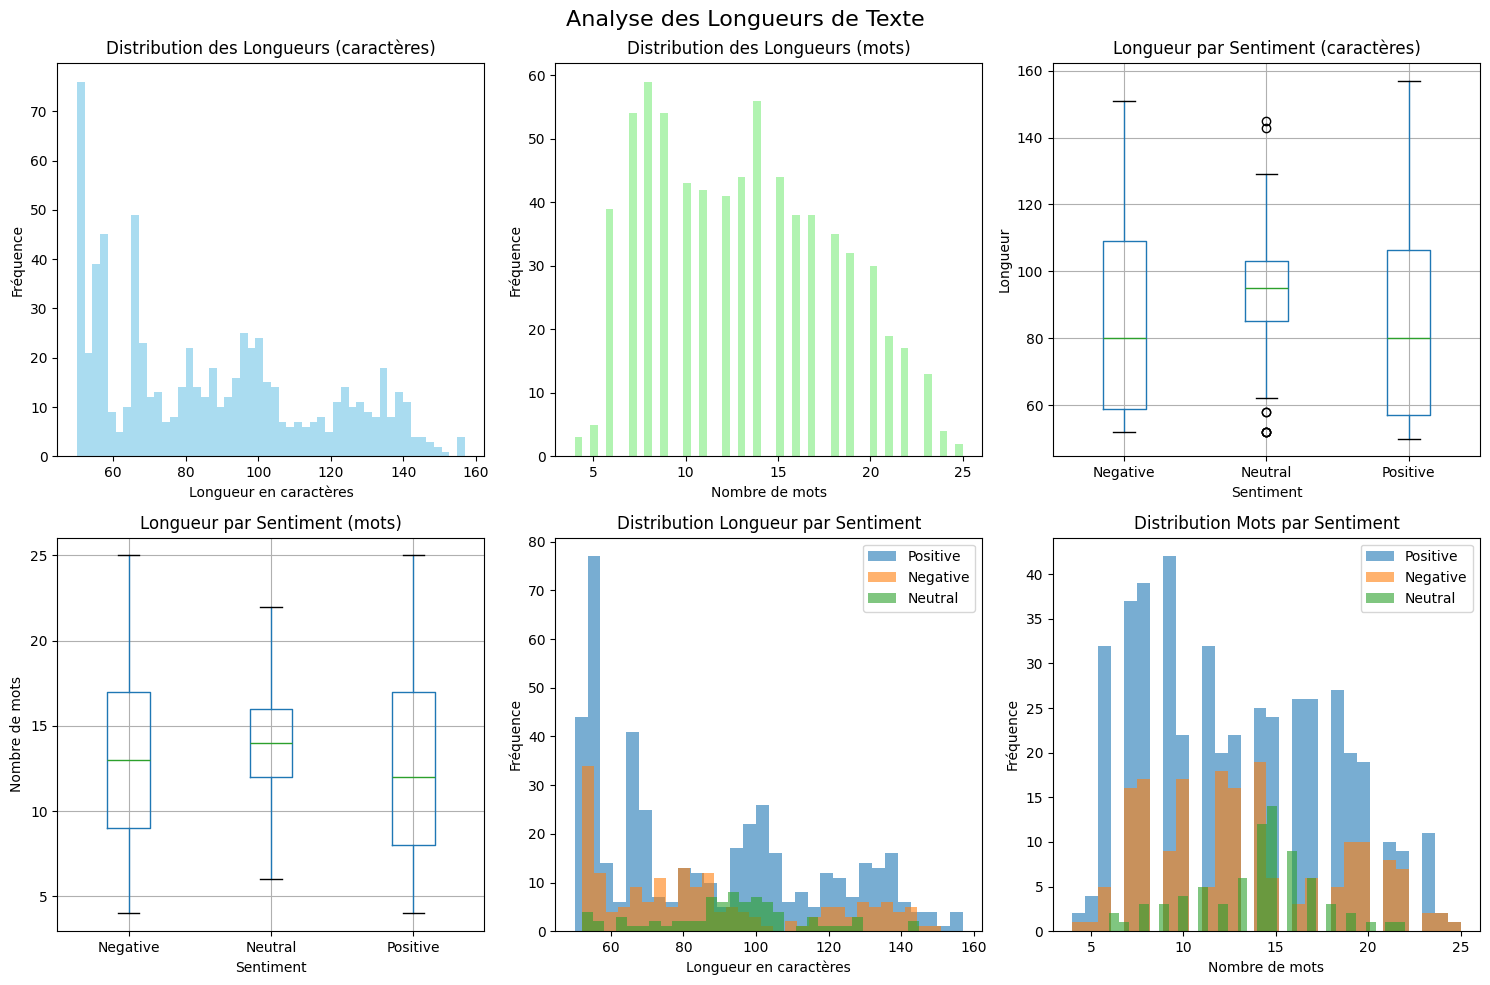

In [44]:
plt.figure(figsize=(15, 10))

# Distribution des longueurs de texte (en caractères et en mots )
plt.subplot(2, 3, 1)
plt.hist(data['text_length'], bins=50, alpha=0.7, color='skyblue')
plt.title('Distribution des Longueurs (caractères)')
plt.xlabel('Longueur en caractères')
plt.ylabel('Fréquence')

plt.subplot(2, 3, 2)
plt.hist(data['word_count'], bins=50, alpha=0.7, color='lightgreen')
plt.title('Distribution des Longueurs (mots)')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')

# Boxplots par sentiment
plt.subplot(2, 3, 3)
data.boxplot(column='text_length', by='Sentiment_grouped', ax=plt.gca())
plt.title('Longueur par Sentiment (caractères)')
plt.xlabel('Sentiment')
plt.ylabel('Longueur')

plt.subplot(2, 3, 4)
data.boxplot(column='word_count', by='Sentiment_grouped', ax=plt.gca())
plt.title('Longueur par Sentiment (mots)')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de mots')

# Histogrammes comparatifs
plt.subplot(2, 3, 5)
for sentiment in data['Sentiment_grouped'].unique():
    subset = data[data['Sentiment_grouped'] == sentiment]
    plt.hist(subset['text_length'], alpha=0.6, label=sentiment, bins=30)
plt.title('Distribution Longueur par Sentiment')
plt.xlabel('Longueur en caractères')
plt.ylabel('Fréquence')
plt.legend()

plt.subplot(2, 3, 6)
for sentiment in data['Sentiment_grouped'].unique():
    subset = data[data['Sentiment_grouped'] == sentiment]
    plt.hist(subset['word_count'], alpha=0.6, label=sentiment, bins=30)
plt.title('Distribution Mots par Sentiment')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.legend()

plt.subplots_adjust(top=0.9)
plt.suptitle('Analyse des Longueurs de Texte', fontsize=16)
plt.tight_layout()
plt.show()

## Preprocessing text data

In [45]:
# Définition d'une classe de préprocessing

class TextPreprocessor:
    """Classe pour le préprocessing du texte"""
    
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.stemmer = PorterStemmer()
        self.lemmatizer = WordNetLemmatizer()
    
    def clean_text(self, text):
        """Nettoyage basique du texte"""
        # Conversion en minuscules
        text = text.lower()
        # Suppression des caractères spéciaux et chiffres
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Suppression des espaces multiples
        text = re.sub(r'\s+', ' ', text)
        return text.strip()
    
    def tokenize_text(self, text):
        """Tokenisation du texte"""
        return word_tokenize(text)
    
    def remove_stopwords(self, tokens):
        """Suppression des mots vides"""
        return [token for token in tokens if token not in self.stop_words]
    
    def stem_tokens(self, tokens):
        """Stemming des tokens"""
        return [self.stemmer.stem(token) for token in tokens]
    
    def lemmatize_tokens(self, tokens):
        """Lemmatisation des tokens"""
        return [self.lemmatizer.lemmatize(token) for token in tokens]
    
    def preprocess_text(self, text, use_stemming=True):
        """Pipeline complet de préprocessing"""
        # Nettoyage
        cleaned_text = self.clean_text(text)
        
        # Tokenisation
        tokens = self.tokenize_text(cleaned_text)
        
        # Suppression des mots vides
        tokens = self.remove_stopwords(tokens)
        
        # Stemming ou Lemmatisation
        if use_stemming:
            tokens = self.stem_tokens(tokens)
        else:
            tokens = self.lemmatize_tokens(tokens)
        
        return ' '.join(tokens)

# Préprocessing des données
print("\n=== PRÉPROCESSING DES DONNÉES ===")
preprocessor = TextPreprocessor()

# Avant préprocessing
print("Exemple AVANT préprocessing:")
print(f"Original: {data['Text'].iloc[0]}")

# Application du préprocessing
data['text_processed'] = data['Text'].apply(lambda x: preprocessor.preprocess_text(x))

# Après préprocessing
print(f"Après préprocessing: {data['text_processed'].iloc[0]}")

# Analyse de l'impact du préprocessing
print(f"\nLongueur moyenne avant: {data['Text'].str.len().mean():.1f} caractères")
print(f"Longueur moyenne après: {data['text_processed'].str.len().mean():.1f} caractères")


=== PRÉPROCESSING DES DONNÉES ===
Exemple AVANT préprocessing:
Original:  Enjoying a beautiful day at the park!              
Après préprocessing: enjoy beauti day park

Longueur moyenne avant: 86.9 caractères
Longueur moyenne après: 53.2 caractères


## Training & Evaluation 

In [46]:
# Préparation des données pour l'entraînement
from sklearn.preprocessing import LabelEncoder
X = data['text_processed']
encode_y = LabelEncoder()
y = encode_y.fit_transform(data["Sentiment_grouped"])

In [47]:
print("Correspondance encodage:")
for i, label in enumerate(encode_y.classes_):
    print(f"{i} → '{label}'")

Correspondance encodage:
0 → 'Negative'
1 → 'Neutral'
2 → 'Positive'


In [48]:
# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [49]:
print(f"\nTaille d'entraînement: {len(X_train)}")
print(f"Taille de test: {len(X_test)}")


Taille d'entraînement: 569
Taille de test: 143


In [55]:
print("\n=== CONFIGURATION DES PIPELINES NLP ===")

# Configuration de la cross-validation
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Définition des pipelines avec leurs hyperparamètres
pipelines_config = {
    'Naive_Bayes': {
        'pipeline': Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('classifier', MultinomialNB())
        ]),
        'params': {
            'tfidf__max_features': [500, 1000, 2000],
            'tfidf__ngram_range': [(1, 1), (1, 2)],
            'tfidf__min_df': [1, 2],
            'tfidf__max_df': [0.8, 0.9],
            'classifier__alpha': [0.1, 0.5, 1.0, 2.0],
            'classifier__fit_prior': [True, False]
        }
    },
    
    'Logistic_Regression': {
        'pipeline': Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('classifier', LogisticRegression(random_state=42, max_iter=1000))
        ]),
        'params': {
            'tfidf__max_features': [500, 1000, 2000],
            'tfidf__ngram_range': [(1, 1), (1, 2)],
            'tfidf__min_df': [1, 2],
            'tfidf__max_df': [0.8, 0.9],
            'classifier__C': [0.1, 1.0, 10.0, 100.0],
            'classifier__penalty': ['l1', 'l2'],
            'classifier__solver': ['liblinear', 'saga']
        }
    },
    
    'SVM': {
        'pipeline': Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('classifier', SVC(random_state=42))
        ]),
        'params': {
            'tfidf__max_features': [500, 1000],
            'tfidf__ngram_range': [(1, 1), (1, 2)],
            'tfidf__min_df': [1, 2],
            'tfidf__max_df': [0.8, 0.9],
            'classifier__C': [0.1, 1.0, 10.0],
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__gamma': ['scale', 'auto']
        }
    }
}

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test, cv_folds):
    """Évalue un pipeline avec cross-validation"""
    # Cross-validation baseline
    baseline_scores = cross_val_score(
        pipeline, X_train, y_train, 
        cv=cv_folds, scoring='f1_weighted', n_jobs=-1
    )
    
    # Entraînement et prédiction
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    return {
        'baseline_cv_scores': baseline_scores,
        'baseline_cv_mean': baseline_scores.mean(),
        'baseline_cv_std': baseline_scores.std(),
        'test_accuracy': accuracy,
        'test_precision': precision,
        'test_recall': recall,
        'test_f1': f1,
        'predictions': y_pred
    }

# Stockage des résultats
results = {}
optimized_models = {}

print("Optimisation des pipelines en cours... Veuillez patienter!")

for name, config in pipelines_config.items():
    print(f"\n{'='*60}")
    print(f"OPTIMISATION DU PIPELINE: {name}")
    print(f"{'='*60}")
    
    # === ÉVALUATION BASELINE ===
    print(f"\n1. Évaluation baseline (paramètres par défaut):")
    baseline_results = evaluate_pipeline(
        config['pipeline'], X_train, y_train, X_test, y_test, cv_folds
    )
    
    print(f"   F1-Scores CV: {[f'{score:.3f}' for score in baseline_results['baseline_cv_scores']]}")
    print(f"   F1-Score CV moyen: {baseline_results['baseline_cv_mean']:.3f} ±{baseline_results['baseline_cv_std']:.3f}")
    print(f"   F1-Score Test: {baseline_results['test_f1']:.3f}")
    
    # === OPTIMISATION AVEC GRIDSEARCH ===
    print(f"\n2. Optimisation avec GridSearchCV:")
    print(f"   Nombre de combinaisons: {np.prod([len(v) for v in config['params'].values()])}")
    
    grid_search = GridSearchCV(
        estimator=config['pipeline'],
        param_grid=config['params'],
        cv=cv_folds,
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=0
    )
    
    # Fit GridSearch
    grid_search.fit(X_train, y_train)
    
    # Meilleur pipeline
    best_pipeline = grid_search.best_estimator_
    y_pred_optimized = best_pipeline.predict(X_test)
    
    # Métriques du modèle optimisé
    accuracy_opt = accuracy_score(y_test, y_pred_optimized)
    precision_opt, recall_opt, f1_opt, _ = precision_recall_fscore_support(
        y_test, y_pred_optimized, average='weighted'
    )
    
    # Cross-validation finale
    final_cv_scores = cross_val_score(
        best_pipeline, X_train, y_train, 
        cv=cv_folds, scoring='f1_weighted', n_jobs=-1
    )
    
    print(f"   Meilleurs paramètres: {grid_search.best_params_}")
    print(f"   Meilleur score CV: {grid_search.best_score_:.3f}")
    
    # === RÉSULTATS FINAUX ===
    print(f"\n3. Résultats finaux:")
    print(f"   Test Accuracy: {accuracy_opt:.3f}")
    print(f"   Test F1-Score: {f1_opt:.3f}")
    print(f"   CV F1-Score final: {final_cv_scores.mean():.3f} ±{final_cv_scores.std():.3f}")
    
    improvement = grid_search.best_score_ - baseline_results['baseline_cv_mean']
    print(f"   Amélioration vs baseline: {improvement:+.3f}")
    
    # Stockage des résultats
    results[name] = {
        'baseline_results': baseline_results,
        'best_params': grid_search.best_params_,
        'best_cv_score': grid_search.best_score_,
        'final_cv_scores': final_cv_scores,
        'final_cv_mean': final_cv_scores.mean(),
        'final_cv_std': final_cv_scores.std(),
        'test_accuracy': accuracy_opt,
        'test_precision': precision_opt,
        'test_recall': recall_opt,
        'test_f1': f1_opt,
        'predictions': y_pred_optimized,
        'improvement': improvement,
        'grid_search': grid_search
    }
    
    optimized_models[name] = best_pipeline

# === ANALYSE COMPARATIVE ===
print(f"\n{'='*70}")
print("ANALYSE COMPARATIVE DES PIPELINES OPTIMISÉS")
print(f"{'='*70}")

# Création du tableau de comparaison
comparison_data = []
for name, metrics in results.items():
    comparison_data.append({
        'Pipeline': name,
        'Baseline_F1': f"{metrics['baseline_results']['baseline_cv_mean']:.3f}",
        'Optimisé_CV_F1': f"{metrics['best_cv_score']:.3f}",
        'Final_CV_F1': f"{metrics['final_cv_mean']:.3f}",
        'Test_F1': f"{metrics['test_f1']:.3f}",
        'Test_Accuracy': f"{metrics['test_accuracy']:.3f}",
        'Amélioration': f"{metrics['improvement']:+.3f}",
        'CV_Std': f"±{metrics['final_cv_std']:.3f}"
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nTableau de comparaison:")
print(comparison_df.to_string(index=False))

# === SÉLECTION ET ANALYSE DU MEILLEUR MODÈLE ===
best_model_name = max(results.keys(), key=lambda x: results[x]['test_f1'])
best_pipeline = optimized_models[best_model_name]
best_results = results[best_model_name]

print(f"\n{'='*60}")
print(f"🏆 MEILLEUR PIPELINE: {best_model_name}")
print(f"{'='*60}")

print(f"\n📊 Performances:")
print(f"   F1-Score CV: {best_results['final_cv_mean']:.3f} ±{best_results['final_cv_std']:.3f}")
print(f"   F1-Score Test: {best_results['test_f1']:.3f}")
print(f"   Accuracy Test: {best_results['test_accuracy']:.3f}")
print(f"   Amélioration: {best_results['improvement']:+.3f}")

print(f"\n⚙️ Configuration optimale:")
for param, value in best_results['best_params'].items():
    print(f"   {param}: {value}")

# Analyse de stabilité
cv_coefficient_variation = best_results['final_cv_std'] / best_results['final_cv_mean']
generalization_gap = abs(best_results['final_cv_mean'] - best_results['test_f1'])

print(f"\n🔍 Analyse de stabilité:")
print(f"   Coefficient de variation CV: {cv_coefficient_variation:.3f}")
print(f"   Écart CV-Test: {generalization_gap:.3f}")

if cv_coefficient_variation < 0.05:
    stability = "Très stable"
elif cv_coefficient_variation < 0.10:
    stability = "Stable"
else:
    stability = "Instable"

print(f"   Stabilité: {stability}")

if generalization_gap > 0.05:
    print(f"   ⚠️  Attention: Possible surapprentissage")
elif generalization_gap < 0.02:
    print(f"   ✅ Excellente généralisation")
else:
    print(f"   ℹ️  Généralisation acceptable")

# === SAUVEGARDE DU MODÈLE ET DES MÉTADONNÉES ===
print(f"\n{'='*50}")
print("💾 SAUVEGARDE DU MEILLEUR MODÈLE")
print(f"{'='*50}")

# Création du timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Sauvegarde du pipeline
model_filename = f'best_nlp_pipeline_{best_model_name.lower()}_{timestamp}.pkl'
joblib.dump(best_pipeline, model_filename)
print(f"✅ Pipeline sauvegardé: {model_filename}")

# Sauvegarde des métadonnées
metadata = {
    'model_info': {
        'name': best_model_name,
        'timestamp': timestamp,
        'pipeline_steps': [step[0] for step in best_pipeline.steps],
        'best_params': best_results['best_params']
    },
    'performance_metrics': {
        'cv_f1_mean': float(best_results['final_cv_mean']),
        'cv_f1_std': float(best_results['final_cv_std']),
        'test_f1': float(best_results['test_f1']),
        'test_accuracy': float(best_results['test_accuracy']),
        'test_precision': float(best_results['test_precision']),
        'test_recall': float(best_results['test_recall']),
        'improvement_vs_baseline': float(best_results['improvement'])
    },
    'stability_analysis': {
        'cv_coefficient_variation': float(cv_coefficient_variation),
        'generalization_gap': float(generalization_gap),
        'stability_assessment': stability
    },
    'training_info': {
        'cv_folds': cv_folds.n_splits,
        'random_state': 42,
        'scoring_metric': 'f1_weighted'
    }
}

metadata_filename = f'model_metadata_{best_model_name.lower()}_{timestamp}.json'
with open(metadata_filename, 'w', encoding='utf-8') as f:
    json.dump(metadata, f, indent=2, ensure_ascii=False)
print(f"✅ Métadonnées sauvegardées: {metadata_filename}")

# === RAPPORT DÉTAILLÉ ===
print(f"\n{'='*50}")
print("📋 RAPPORT DÉTAILLÉ")
print(f"{'='*50}")

print(f"\n🎯 Classification Report (Meilleur modèle):")
print(classification_report(y_test, best_results['predictions']))

# Matrice de confusion
print(f"\n📊 Matrice de confusion:")
conf_matrix = confusion_matrix(y_test, best_results['predictions'])
print(conf_matrix)

# Informations sur le vectoriseur TF-IDF
tfidf_vectorizer = best_pipeline.named_steps['tfidf']
print(f"\n🔤 Informations TF-IDF:")
print(f"   Vocabulaire: {len(tfidf_vectorizer.vocabulary_)} features")
print(f"   N-gram range: {tfidf_vectorizer.ngram_range}")
print(f"   Max features: {tfidf_vectorizer.max_features}")
print(f"   Min DF: {tfidf_vectorizer.min_df}")
print(f"   Max DF: {tfidf_vectorizer.max_df}")

print(f"\n{'='*50}")
print("🎉 OPTIMISATION TERMINÉE!")
print(f"{'='*50}")

print(f"\n📁 Fichiers générés:")
print(f"   • Modèle: {model_filename}")
print(f"   • Métadonnées: {metadata_filename}")

print(f"\n🚀 Pour utiliser le modèle dans un nouveau notebook:")
print(f"   pipeline = joblib.load('{model_filename}')")
print(f"   predictions = pipeline.predict(new_texts)")

# Sauvegarde simple pour usage rapide
joblib.dump(best_pipeline, 'best_model.pkl')
print(f"   • Modèle simple: best_model.pkl")

print(f"\n📈 Performance finale: F1-Score = {best_results['test_f1']:.3f}")


=== CONFIGURATION DES PIPELINES NLP ===
Optimisation des pipelines en cours... Veuillez patienter!

OPTIMISATION DU PIPELINE: Naive_Bayes

1. Évaluation baseline (paramètres par défaut):
   F1-Scores CV: ['0.713', '0.703', '0.709', '0.629', '0.725']
   F1-Score CV moyen: 0.696 ±0.034
   F1-Score Test: 0.739

2. Optimisation avec GridSearchCV:
   Nombre de combinaisons: 192
   Meilleurs paramètres: {'classifier__alpha': 0.1, 'classifier__fit_prior': True, 'tfidf__max_df': 0.8, 'tfidf__max_features': 2000, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}
   Meilleur score CV: 0.862

3. Résultats finaux:
   Test Accuracy: 0.895
   Test F1-Score: 0.888
   CV F1-Score final: 0.862 ±0.016
   Amélioration vs baseline: +0.166

OPTIMISATION DU PIPELINE: Logistic_Regression

1. Évaluation baseline (paramètres par défaut):
   F1-Scores CV: ['0.713', '0.714', '0.732', '0.629', '0.692']
   F1-Score CV moyen: 0.696 ±0.036
   F1-Score Test: 0.723

2. Optimisation avec GridSearchCV:
   Nombre de com